Google Analytics Customer Revenue - https://www.kaggle.com/c/ga-customer-revenue-prediction
1) Two Data sets, train and test
2) Entity embeddings of categorical variables
3) y = TransactionRevenue, for given x=fullVisitorId

Categorical Variables
['channelGrouping', 'device.browser', 'device.deviceCategory', 'geoNetwork.city', 'device.operatingSystem', 
                'trafficSource.medium', 'trafficSource.source',
                'geoNetwork.continent', 'geoNetwork.country', 'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',  'geoNetwork.subContinent']

Continues Variables
 ['totals.visits', '_visitHour', '_day', '_month', '_weekday']

json columns ['device', 'geoNetwork', 'totals', 'trafficSource']

columns to drop   ['customDimensions','hits', 'visitId', 'totals.sessionQualityDim']

Submission - Root Mean Squared Error (RMSE)
For each fullVisitorId in the test set, you must predict the natural log of their total revenue in PredictedLogRevenue
fullVisitorId,PredictedLogRevenue

In [128]:
from os import path
from fastai.text import *

In [129]:
from fastai.structured import *
from fastai.column_data import *

In [130]:
import pandas as pd # to manipulate data frames 
import numpy as np # to work with matrix
import json # to convert json in df
from pandas.io.json import json_normalize # to normalize the json fi

In [131]:
# json columns
columns = ['device', 'geoNetwork', 'totals', 'trafficSource']

In [132]:
PATH=Path('data/kg-google/')

In [133]:
p=0.07

In [199]:
def json_read(filename):
    df = pd.read_csv(PATH/filename,
                     converters={column: json.loads for column in columns},
                     dtype={'fullVisitorId': 'str'},
#                      skiprows=lambda i : i> 0 and random.random() > p
                     nrows=2000
                    )
    
    for column in columns:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f'{column}.{subcolumn}' for subcolumn in  column_as_df.columns]
        df = df.drop(column,axis=1).merge(column_as_df,right_index=True,left_index=True)
        
#     print(f'Loaded {os,path.basename(data_frame)}. Shape: {df.shape}')
    return df    


In [200]:
df_train = json_read('train_v2.csv')
df_test = json_read('test_v2.csv')

In [201]:
df_train.size

118000

In [202]:
df_train.head()

,channelGrouping,customDimensions,date,fullVisitorId,hits,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,...,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,3162355547410993243,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1508198450,1,1508198450,Firefox,...,NaN,NaN,NaN,NaN,(not set),NaN,water bottle,organic,NaN,google
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,8934116514970143966,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,1508176307,6,1508176307,Chrome,...,NaN,NaN,NaN,NaN,(not set),NaN,NaN,referral,/a/google.com/transportation/mtv-services/bike...,sites.google.com
2,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,7992466427990357681,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1508201613,1,1508201613,Chrome,...,NaN,NaN,NaN,NaN,(not set),True,NaN,(none),NaN,(direct)
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,9075655783635761930,"[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,1508169851,1,1508169851,Chrome,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",20171016,6960673291025684308,"[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,1508190552,1,1508190552,Chrome,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google


In [203]:
df_train.columns
df_test.columns

Index(['channelGrouping', 'customDimensions', 'date', 'fullVisitorId', 'hits',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'device.browser', 'device.browserSize', 'device.browserVersion',
       'device.deviceCategory', 'device.flashVersion', 'device.isMobile',
       'device.language', 'device.mobileDeviceBranding',
       'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName',
       'device.mobileDeviceModel', 'device.mobileInputSelector',
       'device.operatingSystem', 'device.operatingSystemVersion',
       'device.screenColors', 'device.screenResolution', 'geoNetwork.city',
       'geoNetwork.cityId', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.latitude', 'geoNetwork.longitude', 'geoNetwork.metro',
       'geoNetwork.networkDomain', 'geoNetwork.networkLocation',
       'geoNetwork.region', 'geoNetwork.subContinent', 'totals.bounces',
       'totals.hits', 'totals.newVisits', 'totals.pageviews',
       'totals.ses

In [204]:
#columns to drop
to_drop = ['customDimensions', 'hits',
       'socialEngagementType', 'visitId', 'visitNumber', 
        'device.browserSize', 'device.browserVersion',
       'device.deviceCategory', 'device.flashVersion', 'device.isMobile',
       'device.language', 'device.mobileDeviceBranding',
       'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName',
       'device.mobileDeviceModel', 'device.mobileInputSelector',
       'device.screenColors', 'device.screenResolution', 
       'geoNetwork.cityId', 
       'geoNetwork.latitude', 'geoNetwork.longitude', 'geoNetwork.metro',
       'geoNetwork.networkDomain', 'geoNetwork.networkLocation',
        'totals.bounces',
       'totals.sessionQualityDim', 
       'totals.totalTransactionRevenue', 
       'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.criteriaParameters',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.isTrueDirect', 'trafficSource.keyword',
       'trafficSource.medium', 'trafficSource.referralPath',
       'trafficSource.source'
          ]

In [205]:
df_train.drop(to_drop, axis=1, inplace=True)
df_test.drop(to_drop, axis=1, inplace=True)


In [206]:
df_train.columns
df_test.columns


Index(['channelGrouping', 'date', 'fullVisitorId', 'visitStartTime',
       'device.browser', 'device.operatingSystem',
       'device.operatingSystemVersion', 'geoNetwork.city',
       'geoNetwork.continent', 'geoNetwork.country', 'geoNetwork.region',
       'geoNetwork.subContinent', 'totals.hits', 'totals.newVisits',
       'totals.pageviews', 'totals.timeOnSite', 'totals.transactionRevenue',
       'totals.transactions', 'totals.visits'],
      dtype='object')

Handle date

In [207]:
from datetime import datetime

# This function is to extract date features
def date_process(df):
    df["date"] = pd.to_datetime(df["date"], format="%Y%m%d") # setting the column as pandas datetime
    df["_weekday"] = df['date'].dt.weekday #extracting week day
    df["_day"] = df['date'].dt.day # extracting day
    df["_month"] = df['date'].dt.month # extracting day
    df["_year"] = df['date'].dt.year # extracting day
    df['_visitHour'] = (df['visitStartTime'].apply(lambda x: str(datetime.fromtimestamp(x).hour))).astype(int)
    
    return df #returning the df after the transformations

In [208]:
df_train = date_process(df_train)
# df_train.head(n=2)
df_test = date_process(df_test)

Fill NA values

In [209]:
def FillingNaValues(df):    # fillna numeric feature
    df['totals.pageviews'].fillna(1, inplace=True).astype(int) #filling NA's with 1
    df['totals.newVisits'].fillna(0, inplace=True).astype(int) #filling NA's with 0
    df['totals.bounces'].fillna(0, inplace=True).astype(int)   #filling NA's with 0
    df["totals.transactionRevenue"] = df["totals.transactionRevenue"].fillna(0.0).astype(float) #filling NA with zero
    df['trafficSource.isTrueDirect'].fillna(False, inplace=True) # filling boolean with False
    df['trafficSource.adwordsClickInfo.isVideoAd'].fillna(True, inplace=True) # filling boolean with True
    df_train.loc[df_train['geoNetwork.city'] == "(not set)", 'geoNetwork.city'] = np.nan
    df_train['geoNetwork.city'].fillna("NaN", inplace=True)

    return df #return the transformed dataframe

In [210]:
def NumericalColumns(df):    # fillna numeric feature
    df['totals.pageviews'].fillna(1, inplace=True) #filling NA's with 1
    df['totals.newVisits'].fillna(0, inplace=True) #filling NA's with 0
#     df['totals.bounces'].fillna(0, inplace=True)   #filling NA's with 0
#     df['trafficSource.isTrueDirect'].fillna(False, inplace=True) # filling boolean with False
#     df['trafficSource.adwordsClickInfo.isVideoAd'].fillna(True, inplace=True) # filling boolean with True
    df["totals.transactionRevenue"] = df["totals.transactionRevenue"].fillna(0.0).astype(float) #filling NA with zero
    df['totals.pageviews'] = df['totals.pageviews'].astype(int) # setting numerical column as integer
    df['totals.newVisits'] = df['totals.newVisits'].astype(int) # setting numerical column as integer
#     df['totals.bounces'] = df['totals.bounces'].astype(int)  # setting numerical column as integer
    df["totals.hits"] = df["totals.hits"].astype(float) # setting numerical to float
    df['totals.visits'] = df['totals.visits'].astype(int) # seting as int

    return df #return the transformed dataframe

Normailize data

In [211]:
from sklearn import preprocessing

def Normalizing(df):
    # Use MinMaxScaler to normalize the column
    df["totals.hits"] =  (df['totals.hits'] - min(df['totals.hits'])) / (max(df['totals.hits'])  - min(df['totals.hits']))
    # normalizing the transaction Revenue
    df['totals.transactionRevenue'] = df_train['totals.transactionRevenue'].apply(lambda x: np.log1p(x))
    # return the modified df
    return df 

In [212]:
df_train = NumericalColumns(df_train)
df_test = NumericalColumns(df_test)


In [213]:
# df_train['totals.transactionRevenue']
df_train = Normalizing(df_train)
df_test = Normalizing(df_test)
# df_train.columns

Missing values

In [214]:
def missing_values(data):
    total = data.isnull().sum().sort_values(ascending = False) # getting the sum of null values and ordering
    percent = (data.isnull().sum() / data.isnull().count() * 100 ).sort_values(ascending = False) #getting the percent and order of null
    df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # Concatenating the total and percent
    print("Total columns at least one Values: ")
    print (df[~(df['Total'] == 0)]) # Returning values of nulls different of 0
    
    print("\n Total of Sales % of Total: ", round((df_train[df_train['totals.transactionRevenue'] != np.nan]['totals.transactionRevenue'].count() / len(df_train['totals.transactionRevenue']) * 100),4))
    
    return 

In [215]:
# calling the missing values function
missing_values(df_train) 
missing_values(df_test) 


Total columns at least one Values: 
                     Total  Percent
totals.transactions   1976     98.8
totals.timeOnSite      978     48.9

 Total of Sales % of Total:  100.0
Total columns at least one Values: 
                     Total  Percent
totals.transactions   1969    98.45
totals.timeOnSite     1403    70.15

 Total of Sales % of Total:  100.0


In [216]:
df_train = Normalizing(df_train)
df_test = Normalizing(df_test)

In [217]:
df_train.head().T.head(40)

,0,1,2,3,4
channelGrouping,Organic Search,Referral,Direct,Organic Search,Organic Search
date,2017-10-16 00:00:00,2017-10-16 00:00:00,2017-10-16 00:00:00,2017-10-16 00:00:00,2017-10-16 00:00:00
fullVisitorId,3162355547410993243,8934116514970143966,7992466427990357681,9075655783635761930,6960673291025684308
visitStartTime,1508198450,1508176307,1508201613,1508169851,1508190552
device.browser,Firefox,Chrome,Chrome,Chrome,Chrome
device.operatingSystem,Windows,Chrome OS,Android,Windows,Windows
device.operatingSystemVersion,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset
geoNetwork.city,not available in demo dataset,Cupertino,not available in demo dataset,not available in demo dataset,not available in demo dataset
geoNetwork.continent,Europe,Americas,Americas,Asia,Americas
geoNetwork.country,Germany,United States,United States,Turkey,Mexico


In [218]:
df_test.head().T.head(40)

,0,1,2,3,4
channelGrouping,Organic Search,Direct,Organic Search,Direct,Organic Search
date,2018-05-11 00:00:00,2018-05-11 00:00:00,2018-05-11 00:00:00,2018-05-11 00:00:00,2018-05-11 00:00:00
fullVisitorId,7460955084541987166,460252456180441002,3461808543879602873,975129477712150630,8381672768065729990
visitStartTime,1526099341,1526064483,1526067157,1526107551,1526060254
device.browser,Chrome,Chrome,Chrome,Chrome,Internet Explorer
device.operatingSystem,Android,Macintosh,Chrome OS,iOS,Windows
device.operatingSystemVersion,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset
geoNetwork.city,(not set),San Francisco,not available in demo dataset,Houston,Irvine
geoNetwork.continent,Asia,Americas,Americas,Americas,Americas
geoNetwork.country,India,United States,United States,United States,United States


In [219]:
  df_test['totals.transactions'].fillna(1, inplace=True)

In [238]:
df_train['totals.transactions'].fillna(1, inplace=True)
df_train['totals.transactionRevenue'].fillna(1, inplace=True)

In [221]:
cat_vars = ['channelGrouping', 'fullVisitorId', 
       'device.browser', 'device.operatingSystem',
       'device.operatingSystemVersion', 'geoNetwork.city',
       'geoNetwork.continent', 'geoNetwork.country', 'geoNetwork.region',
       'geoNetwork.subContinent','_weekday','_day','_month','_year','_visitHour']
contin_vars = ['totals.hits', 'totals.newVisits',
       'totals.pageviews', 'totals.timeOnSite', 
       'totals.transactions', 'totals.visits']

In [222]:
#save to feather
df_train.to_feather(f'{PATH}df_train')
df_test.to_feather(f'{PATH}df_test')

ArrowInvalid: Error converting from Python objects to Int64: Got Python object of type str but can only handle these types: integer

In [ ]:
df_train = pd.read_feather(f'{PATH}df_train')
df_test = pd.read_feather(f'{PATH}df_test')

In [239]:
dep = 'totals.transactionRevenue'
df_train = df_train[cat_vars+contin_vars+[dep, 'date']].copy()

In [240]:
df_test[dep] = 1
df_test = df_test[cat_vars+contin_vars+[dep, 'date']].copy()

In [241]:
for v in cat_vars: df_train[v] = df_train[v].astype('category').cat.as_ordered()

In [242]:
apply_cats(df_test, df_train)

In [243]:
for v in contin_vars:
    df_train[v] = df_train[v].fillna(0).astype('float32')
    df_test[v] = df_test[v].fillna(0).astype('float32')

In [244]:
samp_size = len(df_train)
df_samp = df_train.set_index("date")

In [245]:
df_samp.head(2)

,channelGrouping,fullVisitorId,device.browser,device.operatingSystem,device.operatingSystemVersion,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.region,geoNetwork.subContinent,...,_month,_year,_visitHour,totals.hits,totals.newVisits,totals.pageviews,totals.timeOnSite,totals.transactions,totals.visits,totals.transactionRevenue
date,,,,,,,,,,,,,,,,,,,,,
2017-10-16,Organic Search,3162355547410993243,Firefox,Windows,not available in demo dataset,not available in demo dataset,Europe,Germany,not available in demo dataset,Western Europe,...,10,2017,20,0.000000,1.0,1.0,0.0,1.0,1.0,0.0
2017-10-16,Referral,8934116514970143966,Chrome,Chrome OS,not available in demo dataset,Cupertino,Americas,United States,California,Northern America,...,10,2017,13,0.006098,0.0,2.0,28.0,1.0,1.0,0.0


In [246]:
df, y, nas, mapper = proc_df(df_samp, 'totals.transactionRevenue', do_scale=True)
yl = np.log(y)

D:\python\envs\fastai\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [247]:
df_test = df_test.set_index("date")

In [248]:
df_test, _, nas, mapper = proc_df(df_test, dep, do_scale=True,
                                  mapper=mapper, na_dict=nas)

In [249]:
df_test.head(2)

,channelGrouping,fullVisitorId,device.browser,device.operatingSystem,device.operatingSystemVersion,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.region,geoNetwork.subContinent,...,_day,_month,_year,_visitHour,totals.hits,totals.newVisits,totals.pageviews,totals.timeOnSite,totals.transactions,totals.visits
date,,,,,,,,,,,,,,,,,,,,,
2018-05-11,4,0,3,2,1,1,4,37,11,15,...,0,0,0,1,0.133261,-1.760216,-0.187139,2.103952,0.0,0.0
2018-05-11,2,835,3,5,1,59,3,88,8,10,...,0,0,0,15,0.133261,-1.760216,-0.187139,-0.260453,0.0,0.0


In [250]:
df.head(2)

,channelGrouping,fullVisitorId,device.browser,device.operatingSystem,device.operatingSystemVersion,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.region,geoNetwork.subContinent,...,_day,_month,_year,_visitHour,totals.hits,totals.newVisits,totals.pageviews,totals.timeOnSite,totals.transactions,totals.visits
date,,,,,,,,,,,,,,,,,,,,,
2017-10-16,4,556,5,8,1,77,5,31,57,19,...,1,1,1,21,-0.435493,0.568112,-0.479088,-0.385838,0.0,0.0
2017-10-16,6,1694,3,3,1,17,3,88,8,10,...,1,1,1,14,-0.336077,-1.760216,-0.333114,-0.314189,0.0,0.0


In [251]:
train_ratio = 0.75
# train_ratio = 0.9
train_size = int(samp_size * train_ratio); train_size
val_idx = list(range(train_size, len(df)))

In [252]:
val_idx

[1500,
 1501,
 1502,
 1503,
 1504,
 1505,
 1506,
 1507,
 1508,
 1509,
 1510,
 1511,
 1512,
 1513,
 1514,
 1515,
 1516,
 1517,
 1518,
 1519,
 1520,
 1521,
 1522,
 1523,
 1524,
 1525,
 1526,
 1527,
 1528,
 1529,
 1530,
 1531,
 1532,
 1533,
 1534,
 1535,
 1536,
 1537,
 1538,
 1539,
 1540,
 1541,
 1542,
 1543,
 1544,
 1545,
 1546,
 1547,
 1548,
 1549,
 1550,
 1551,
 1552,
 1553,
 1554,
 1555,
 1556,
 1557,
 1558,
 1559,
 1560,
 1561,
 1562,
 1563,
 1564,
 1565,
 1566,
 1567,
 1568,
 1569,
 1570,
 1571,
 1572,
 1573,
 1574,
 1575,
 1576,
 1577,
 1578,
 1579,
 1580,
 1581,
 1582,
 1583,
 1584,
 1585,
 1586,
 1587,
 1588,
 1589,
 1590,
 1591,
 1592,
 1593,
 1594,
 1595,
 1596,
 1597,
 1598,
 1599,
 1600,
 1601,
 1602,
 1603,
 1604,
 1605,
 1606,
 1607,
 1608,
 1609,
 1610,
 1611,
 1612,
 1613,
 1614,
 1615,
 1616,
 1617,
 1618,
 1619,
 1620,
 1621,
 1622,
 1623,
 1624,
 1625,
 1626,
 1627,
 1628,
 1629,
 1630,
 1631,
 1632,
 1633,
 1634,
 1635,
 1636,
 1637,
 1638,
 1639,
 1640,
 1641,
 1642,

Root-mean-squared percent error is the metric Kaggle used for this competition.

In [253]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

In [254]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl.astype(np.float32), cat_flds=cat_vars, bs=128,
                                       test_df=df_test)

In [255]:
cat_sz = [(c, len(df_samp[c].cat.categories)+1) for c in cat_vars]

In [256]:
cat_sz

[('channelGrouping', 8),
 ('fullVisitorId', 1891),
 ('device.browser', 17),
 ('device.operatingSystem', 11),
 ('device.operatingSystemVersion', 2),
 ('geoNetwork.city', 78),
 ('geoNetwork.continent', 7),
 ('geoNetwork.country', 93),
 ('geoNetwork.region', 58),
 ('geoNetwork.subContinent', 20),
 ('_weekday', 2),
 ('_day', 2),
 ('_month', 2),
 ('_year', 2),
 ('_visitHour', 25)]

In [257]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [258]:
emb_szs

[(8, 4),
 (1891, 50),
 (17, 9),
 (11, 6),
 (2, 1),
 (78, 39),
 (7, 4),
 (93, 47),
 (58, 29),
 (20, 10),
 (2, 1),
 (2, 1),
 (2, 1),
 (2, 1),
 (25, 13)]

In [262]:
cat_sz.shape[1]

AttributeError: 'list' object has no attribute 'shape'

In [259]:
m = md.get_learner(emb_szs,len(df.columns)-len(cat_vars),0.04,1,[1000,500],[0.001,0.01])
m.summary()

TypeError: torch.index_select received an invalid combination of arguments - got ([32;1mtorch.cuda.FloatTensor[0m, [32;1mint[0m, [31;1mtorch.cuda.FloatTensor[0m), but expected (torch.cuda.FloatTensor source, int dim, torch.cuda.LongTensor index)

In [193]:
lr=1e-2
m.lr_find()

  0%|                                                                               | 0/8955 [00:00<?, ?it/s, loss=inf]


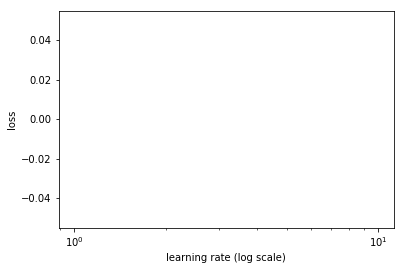

In [194]:
m.sched.plot(100)

In [195]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [196]:
m.fit(lr, 3, metrics=[exp_rmspe])

 82%|███████████████████████████████████████████████████████▉            | 7372/8955 [02:10<00:27, 56.58it/s, loss=nan]

KeyboardInterrupt: 

 82%|███████████████████████████████████████████████████████▉            | 7372/8955 [02:30<00:32, 49.14it/s, loss=nan]